In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [18]:
url = 'https://raw.githubusercontent.com/gaurab456/Compressive-Strength-of-Concrete/main/compresive_strength_concrete.csv'
con_data = pd.read_csv(url)
con_data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [19]:
con_data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [20]:
con_data = con_data.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Cement',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Slag',
       'Fly Ash (component 3)(kg in a m^3 mixture)':'Ash',
       'Water  (component 4)(kg in a m^3 mixture)':'Water',
       'Superplasticizer (component 5)(kg in a m^3 mixture)':'Superplasticizer',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Coarse Aggregate',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Fine Aggregate', 'Age (day)':'Age',
       'Concrete compressive strength(MPa, megapascals) ':'CCS'})

In [21]:
con_data.head()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [22]:
con_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Cement            1030 non-null   float64
 1   Slag              1030 non-null   float64
 2   Ash               1030 non-null   float64
 3   Water             1030 non-null   float64
 4   Superplasticizer  1030 non-null   float64
 5   Coarse Aggregate  1030 non-null   float64
 6   Fine Aggregate    1030 non-null   float64
 7   Age               1030 non-null   int64  
 8   CCS               1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [24]:
con_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
CCS,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


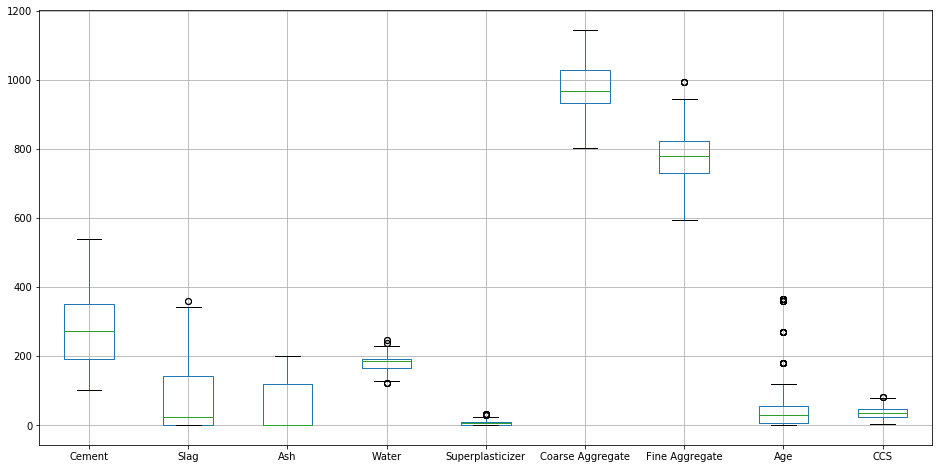

In [27]:
con_data.boxplot(figsize=(16,8))

#### From above plot we can see our data has outliers in Features SLag, Water, Superplasticizer, Finr aggrgate and Age.
- After doing multivariate analysis we will treat these outliers by using IQR method.

In [36]:
#Detecting outlier by using Z-Score
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [37]:
detect_outliers(con_data['Slag'])

[359.4, 359.4, 342.1, 342.1]

### Multivariate Analysis

In [39]:
data = con_data.copy()

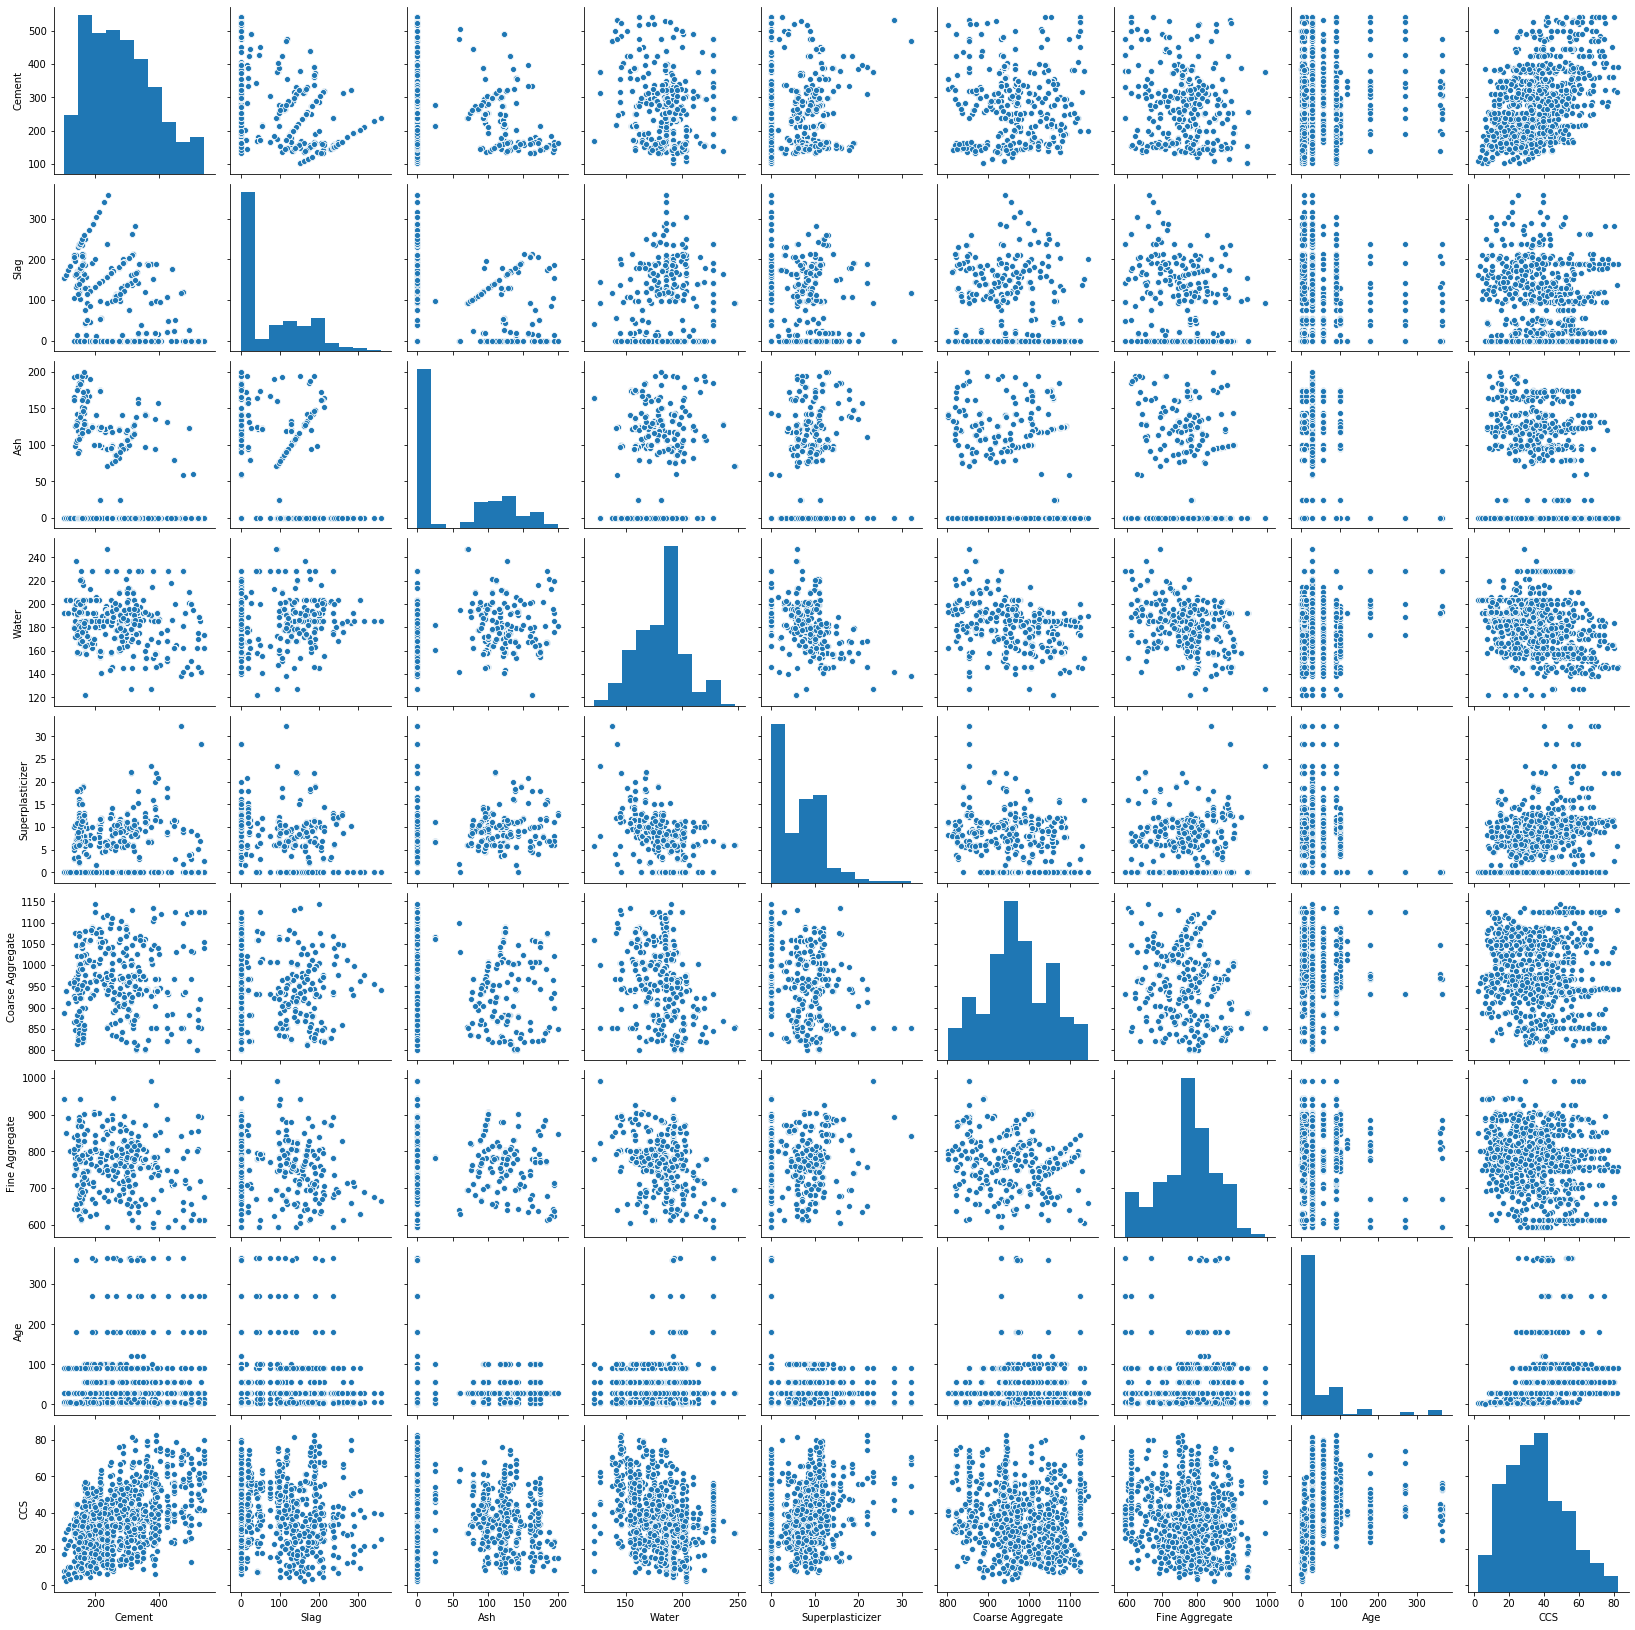

In [40]:
sns.pairplot(data=data)

In [42]:
data.columns

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'CCS'],
      dtype='object')

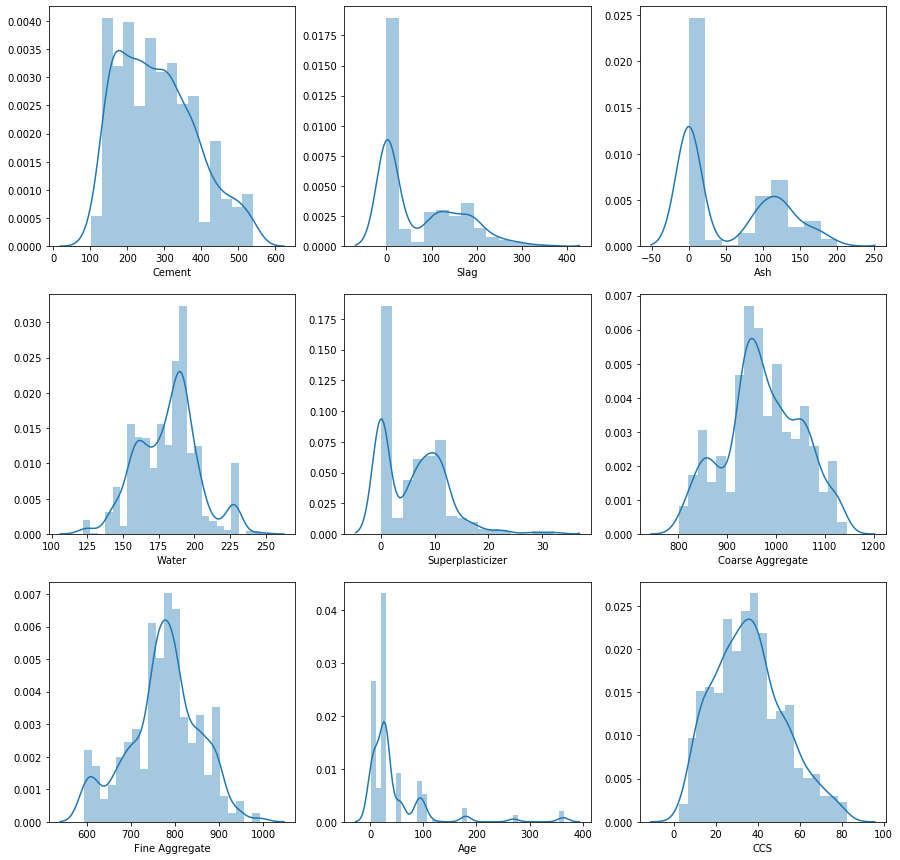

In [43]:
fig, ax2 = plt.subplots(3,3, figsize=(15,15))
sns.distplot(data['Cement'],ax=ax2[0][0])
sns.distplot(data['Slag'],ax=ax2[0][1])
sns.distplot(data['Ash'],ax=ax2[0][2])
sns.distplot(data['Water'],ax=ax2[1][0])
sns.distplot(data['Superplasticizer'],ax=ax2[1][1])
sns.distplot(data['Coarse Aggregate'],ax=ax2[1][2])
sns.distplot(data['Fine Aggregate'],ax=ax2[2][0])
sns.distplot(data['Age'],ax=ax2[2][1])
sns.distplot(data['CCS'],ax=ax2[2][2])

##### Observation:
- Cement, Fine Aggregate & Coarse Aggregate is almost normally distributed.
- Other Features are skewed.
- Age has multiple gaussians and rightly skewed.

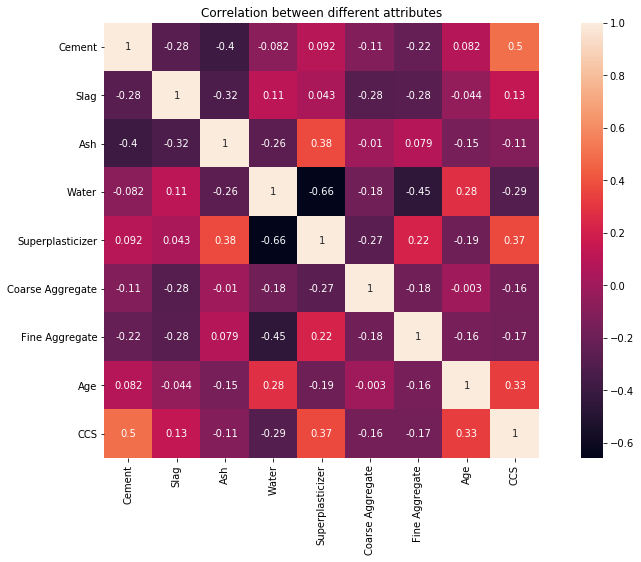

In [49]:
#Let's check the correlation.
plt.figure(figsize=(15,8))
data_corr = data.corr()
sns.heatmap(data_corr, square=True, annot=True)
plt.title('Correlation between different attributes')
plt.show()

##### Observation:
- We can't see any positive co relations between the variables.
- However, there is a negeative corelation of 66% between water & Superplasticizer

#### Outlier Treatment

In [50]:
 #SLag, Water, Superplasticizer, Finr aggrgate and Age.


In [51]:
#Slag
data.Slag.describe()

count    1030.000000
mean       73.895825
std        86.279342
min         0.000000
25%         0.000000
50%        22.000000
75%       142.950000
max       359.400000
Name: Slag, dtype: float64

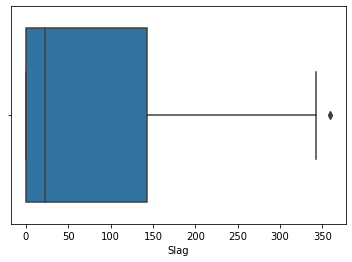

In [57]:
sns.boxplot(x='Slag',data=data)

In [59]:
slag_Q1 = data['Slag'].quantile(q=0.25)
slag_Q3 = data['Slag'].quantile(q=0.75)
lower_limit_slag = slag_Q1-1.5*(slag_Q3-slag_Q1)
upper_limit_slag = slag_Q3+1.5*(slag_Q3-slag_Q1)
lower_limit_slag, upper_limit_slag

(-214.42499999999998, 357.375)

In [73]:
data[data['Slag']<lower_limit_slag]

,Cement,Slag,Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS


In [72]:
data[(data.Slag >= upper_limit_slag) | (data.Slag < lower_limit_slag)]

,Cement,Slag,Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
553,239.6,359.4,0.0,185.7,0.0,941.6,664.3,7,25.42
559,239.6,359.4,0.0,185.7,0.0,941.6,664.3,28,39.44


In [74]:
#Water
wat_Q1 = data['Water'].quantile(q=0.25)
wat_Q3 = data['Water'].quantile(q=0.75)
lower_limit_wat = wat_Q1-1.5*(wat_Q3-wat_Q1)
upper_limit_wat = wat_Q3+1.5*(wat_Q3-wat_Q1) #IQR = wat_Q3-wat_Q1
lower_limit_wat, upper_limit_wat

(124.25000000000001, 232.64999999999998)

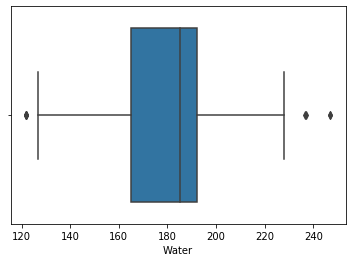

In [77]:
sns.boxplot(x='Water',data=data)

In [75]:
data['Water'].describe()

count    1030.000000
mean      181.567282
std        21.354219
min       121.800000
25%       164.900000
50%       185.000000
75%       192.000000
max       247.000000
Name: Water, dtype: float64

In [76]:
data[(data.Water >= upper_limit_wat) | (data.Water < lower_limit_wat)]

,Cement,Slag,Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
224,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,3,7.75
225,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,14,17.82
226,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,28,24.24
227,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,56,32.85
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23
862,140.0,164.0,128.0,237.0,6.0,869.0,656.0,28,35.23
873,237.0,92.0,71.0,247.0,6.0,853.0,695.0,28,28.63
936,236.9,91.7,71.5,246.9,6.0,852.9,695.4,28,28.63
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28,35.23


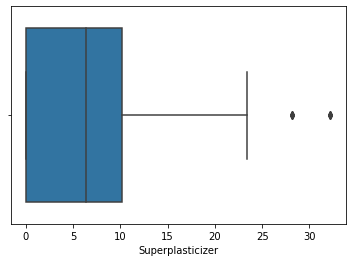

In [78]:
#Superplasticizer
sns.boxplot(x='Superplasticizer',data=data)

In [81]:
sup_Q1 = data['Superplasticizer'].quantile(q=0.25)
sup_q2 = data['Superplasticizer'].quantile(q=0.75)
sup_lower_limit = sup_Q1-1.5*(sup_q2-sup_Q1)
sup_upper_limit = sup_q2+1.5*(sup_q2-sup_Q1)
sup_lower_limit, sup_upper_limit

(-15.299999999999999, 25.5)

In [82]:
data['Superplasticizer'].describe()

count    1030.000000
mean        6.204660
std         5.973841
min         0.000000
25%         0.000000
50%         6.400000
75%        10.200000
max        32.200000
Name: Superplasticizer, dtype: float64

In [84]:
data[(data.Superplasticizer > sup_upper_limit)]

,Cement,Slag,Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
76,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,40.2
79,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.3
99,469.0,117.2,0.0,137.8,32.2,852.1,840.5,7,54.9
102,531.3,0.0,0.0,141.8,28.2,852.1,893.7,7,46.9
122,469.0,117.2,0.0,137.8,32.2,852.1,840.5,28,66.9
125,531.3,0.0,0.0,141.8,28.2,852.1,893.7,28,56.4
145,469.0,117.2,0.0,137.8,32.2,852.1,840.5,56,69.3
148,531.3,0.0,0.0,141.8,28.2,852.1,893.7,56,58.8
168,469.0,117.2,0.0,137.8,32.2,852.1,840.5,91,70.7
171,531.3,0.0,0.0,141.8,28.2,852.1,893.7,91,59.2


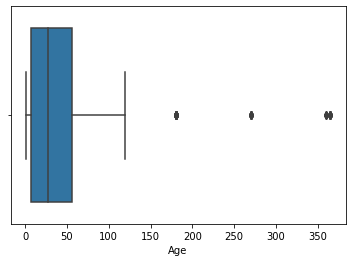

In [85]:
#Age
sns.boxplot(x='Age',data=data)

In [87]:
age_Q1 = data['Age'].quantile(q=0.25)
age_q2 = data['Age'].quantile(q=0.75)
age_lower_limit = age_Q1-1.5*(age_q2-age_Q1)
age_upper_limit = age_q2+1.5*(age_q2-sup_Q1)
age_lower_limit, age_upper_limit

(-66.5, 140.0)

In [93]:
#No of outliers in Age Column
data[(data.Age > age_upper_limit)].shape[0]

59

In [98]:
#treating outlier value with column median 

for cols in data.columns[:-1]:
    q1 = data[cols].quantile(0.25)
    q2 = data[cols].quantile(0.75)
    iqr = q2 - q1
    low_limit = q1 - 1.5*iqr
    upp_limit = q2 + 1.5*iqr
    
    data.loc[(data[cols] < low_limit) | (data[cols] > upp_limit),cols] = data[cols].median()

In [95]:
data.columns[:-1]

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

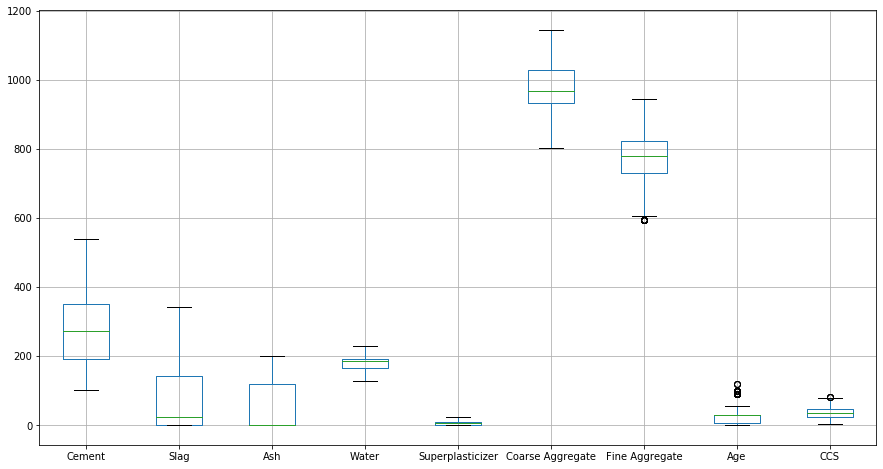

In [99]:
data.boxplot(figsize=(15,8))

### Model Building

In [100]:
final_data = data.copy()

In [101]:
final_data.head()

,Cement,Slag,Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CCS
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28.0,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28.0,44.30


In [102]:
X = final_data.drop(columns='CCS',axis=1)
Y = final_data['CCS']

In [106]:
from scipy.stats import zscore

Xscaled =X.apply(zscore)
Xscaled_df=pd.DataFrame(Xscaled,columns=X.columns)

In [107]:
Xscaled_df

,Cement,Slag,Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,0.863154,-1.227306,-0.153159
1,2.477915,-0.858192,-0.847144,-0.954349,-0.634503,1.056164,-1.227306,-0.153159
2,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
3,0.491425,0.811541,-0.847144,2.250592,-1.091166,-0.526517,-2.269700,-0.153159
4,-0.790459,0.693195,-0.847144,0.502442,-1.091166,0.070527,0.673158,-0.153159
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.501029,0.564545,-0.099698,0.534552,-1.323005,-0.053976,-0.153159
1026,0.392819,-0.858192,0.960068,0.696681,0.808549,-1.994680,0.519341,-0.153159
1027,-1.270088,0.775217,0.850635,0.536434,0.023090,-1.036064,0.094756,-0.153159
1028,-1.168610,1.329451,-0.847144,-0.293937,0.972948,0.214641,0.207894,-0.153159


In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xscaled,Y,test_size = 0.3, random_state = 2)

### Random Forest

In [112]:
from sklearn.ensemble import RandomForestRegressor
model1 = RandomForestRegressor()
model1.fit(X_train,y_train)

RandomForestRegressor()

In [115]:
y_pred = model1.predict(X_test)

In [116]:
#Model Performance on Training Data
model1.score(X_train,y_train)

0.9794083045289995

In [117]:
#Model Performance on Test Data
model1.score(X_test,y_test)

0.9068405723325896

In [121]:
#regression accuracy score
from sklearn import metrics
RFG_accuracy = metrics.r2_score(y_test,y_pred)
RFG_accuracy

0.9068405723325896

In [122]:
metrics.mean_squared_error(y_test, y_pred)

24.78309760679973

### Ada Boosting Regressor

In [124]:
from sklearn.ensemble import AdaBoostRegressor
model2 = AdaBoostRegressor()
model2.fit(X_train,y_train)

AdaBoostRegressor()

In [127]:
#Model Performance on Training Data
model2.score(X_train,y_train)

0.8181433210577835

In [128]:
#Model Performance on Test Data
model2.score(X_test,y_test)

0.7660073039950763

In [129]:
y_pred = model2.predict(X_test)

In [132]:
Ada_accuracy = metrics.r2_score(y_test,y_pred)
Ada_accuracy

0.7660073039950763

In [130]:
metrics.mean_squared_error(y_test, y_pred)

62.24881334685261

### Gradient Boosting Regressor

In [136]:
from sklearn.ensemble import GradientBoostingRegressor
model3 = GradientBoostingRegressor()
model3.fit(X_train,y_train)

GradientBoostingRegressor()

In [137]:
#Model Performance on Training Data
model3.score(X_train,y_train)

0.9442540085260056

In [138]:
#Model Performance on Test Data
model3.score(X_test,y_test)

0.88352274920489

In [139]:
y_pred = model3.predict(X_test)

In [142]:
GBR_accuracy = metrics.r2_score(y_test,y_pred)
GBR_accuracy

0.88352274920489

In [143]:
metrics.mean_squared_error(y_test, y_pred)

30.986311828069923

### Bagging Regressor

In [145]:
from sklearn.ensemble import BaggingRegressor
model4 = BaggingRegressor()
model4.fit(X_train,y_train)

BaggingRegressor()

In [146]:
#Model Performance on Training Data
model4.score(X_train,y_train)

0.9721212367381756

In [148]:
#Model Performance on Test Data
model4.score(X_test,y_test)

0.8999058357253906

In [149]:
y_pred = model4.predict(X_test)

In [150]:
BR_accuracy = metrics.r2_score(y_test,y_pred)
BR_accuracy

0.8999058357253906

### XGBoost Regressor

In [152]:
from xgboost.sklearn import XGBRegressor
model5 = XGBRegressor()
model5.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [153]:
#Model Performance on Training Data
model5.score(X_train,y_train)

0.9913385896021751

In [154]:
#Model Performance on Test Data
model5.score(X_test,y_test)

0.9168952476525777

In [155]:
y_pred = model5.predict(X_test)

In [156]:
XGB_accuracy = metrics.r2_score(y_test,y_pred)
XGB_accuracy

0.9168952476525777

### Support Vector Regressor

In [158]:
from sklearn.svm import SVR
model6 = SVR()
model6.fit(X_train,y_train)

SVR()

In [161]:
#Model Performance on Training Data
model6.score(X_train,y_train)

0.7023338317051798

In [160]:
#Model Performance on Test Data
model6.score(X_test,y_test)

0.7292501433262084

In [162]:
y_pred = model6.predict(X_test)

In [163]:
SVC_accuracy = metrics.r2_score(y_test,y_pred)
SVC_accuracy

0.7292501433262084

In [164]:
#Best accuracy we got from RandomForest 
model1.feature_importances_

array([0.32996872, 0.07093256, 0.02188622, 0.15387493, 0.03166217,
       0.02906605, 0.04406297, 0.31854638])

In [165]:
X_train.columns

Index(['Cement', 'Slag', 'Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age'],
      dtype='object')

In [167]:
pd.Series(model1.feature_importances_,index=X_train.columns).sort_values(ascending=False)

Cement              0.329969
Age                 0.318546
Water               0.153875
Slag                0.070933
Fine Aggregate      0.044063
Superplasticizer    0.031662
Coarse Aggregate    0.029066
Ash                 0.021886
dtype: float64